In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question1 

In [1]:
def question1(n):
    if n == 0:
        sequence = '[]'
    else:
        sequence = []
        for i in range(n+1):
            if i == 1:
                sequence.append(0)
            elif i == 2:
                sequence.append(1)
            elif i > 2:
                sequence.append(sequence[-2] + sequence[-1])
    return sequence

In [6]:
question1(3)

[0, 1, 1]

## Question 2

In [60]:
def question2(n):
    newlist = []
    temp_sum = 0

    # Either of these would work for the mean
    avg = np.mean(n)
    avg = sum(n)/len(n)

    # Either of these would work for the standard deviation
    std = np.std(n)
    for i in n:
        temp_sum += (i - avg)**2
    std = (temp_sum / len(n))**(1/2)
    for j in n:
        if j >= avg-std and j <= avg+std:
            newlist.append(j)

    return newlist

In [61]:
question2([4,5,3,6,8,3])

[4, 5, 6]

## Question 3

In [16]:
def question3(n):
    if n < 1:
        print('Error: Given integer must be at least 1')
        return
    
    else:
        x = np.zeros((n,n), dtype = int)
        
        # Any of these would work
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if i % 2 != j % 2:
                    x[i][j] = 1
        
        plt.imshow(x,cmap = 'gray')
        plt.axis('off')
        plt.show()
        
        return x

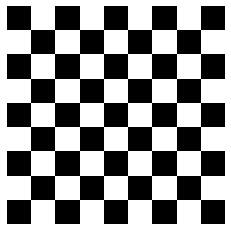

array([[0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0]])

In [18]:
question3(9)

## Question 4

### 4.1

In [38]:
x = [1,2,3,4,5,6]
p = [1/3,1/12,1/12,1/6,1/6,1/6]
pop = np.random.choice(x, p=p, size=1000000)
print(f'checking first 10 elements: {pop[:10]}')

checking first 10 elements: [4 1 3 2 1 1 6 5 6 1]


### 4.2

In [39]:
n_sample = 10000
size_sample = 10000
samples = [np.random.choice(pop, size=size_sample) for i in range(n_sample)]

### 4.3

Computing $\mu$ and $\sigma$

In [40]:
mu = sum([p[i]*x[i] for i in range(len(p))])
sigma = np.sqrt(sum([p[i]*(x[i]-mu)**2 for i in range(len(p))]))
print(f'mu: {mu}')
print(f'sigma: {sigma}')

mu: 3.25
sigma: 1.920286436967152


In [41]:
rvs = []
for i in samples:
    rv = np.sqrt(size_sample)*((sum(i)/size_sample - mu)/sigma)
    rvs.append(rv)

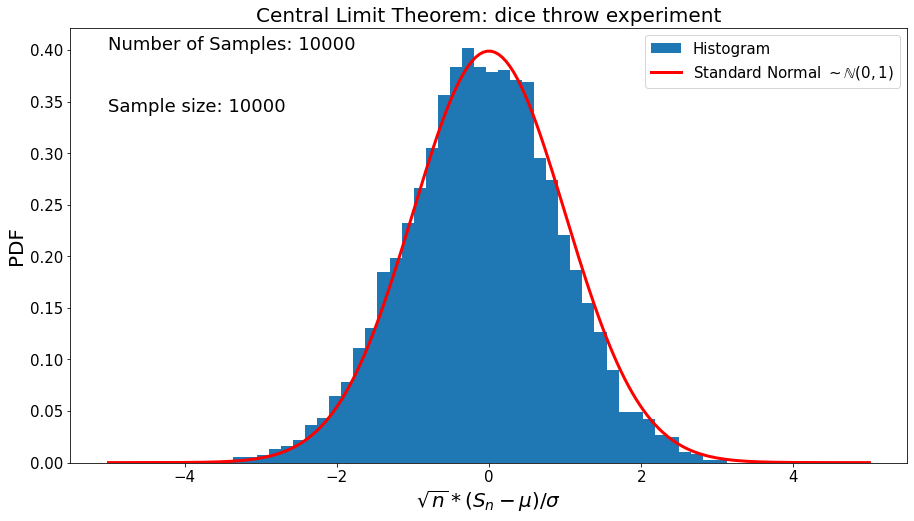

In [43]:
from scipy import stats
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)

plt.hist(rvs,density=True,bins=50, label = 'Histogram')

ax.set_xlabel('$\sqrt{n}*(S_n - \mu)/\sigma$',size = 20)
ax.set_ylabel('PDF',size = 20)
ax.set_title('Central Limit Theorem: dice throw experiment',size = 20)
plt.yticks(size=15)
plt.xticks(size=15)

x = np.linspace(-5,5,200)
plt.plot(x, stats.norm.pdf(x, 0, 1), color = 'r',lw = 3, label = 'Standard Normal $\sim \mathbb{N}(0,1)$')
ax.legend(loc=1, prop={'size': 15})
plt.text(-5,0.40,'Number of Samples: '+str(n_sample), fontsize=18)
plt.text(-5,0.34,'Sample size: '+str(size_sample), fontsize=18)
plt.show()

### 4.4

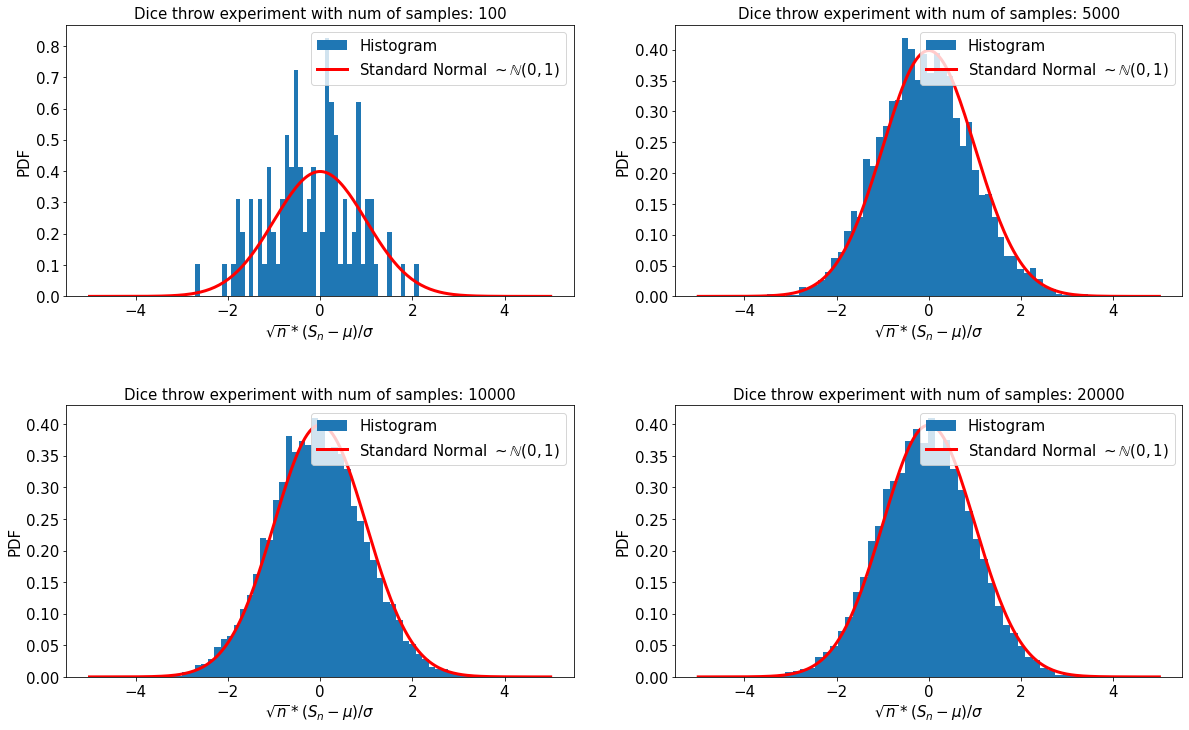

In [50]:
n_sample = [100, 5000, 10000, 20000]
size_sample = 10000
fig = plt.figure(figsize=(20,12))
for i in range(4):
    samples = [np.random.choice(pop, size=size_sample) for i in range(n_sample[i])]
    ax = fig.add_subplot(2,2,i+1)
    ## generating the random variable
    rvs = []
    for ii in samples:
        rv = np.sqrt(size_sample)*((sum(ii)/size_sample - mu)/sigma)
        rvs.append(rv)
        
    ## Plotting
    plt.hist(rvs,density=True,bins=50, label = 'Histogram')

    ax.set_xlabel('$\sqrt{n}*(S_n - \mu)/\sigma$',size = 15)
    ax.set_ylabel('PDF',size = 15)
    ax.set_title(f'Dice throw experiment with num of samples: {n_sample[i]}',size = 15)
    plt.yticks(size=15)
    plt.xticks(size=15)

    x = np.linspace(-5,5,200)
    plt.plot(x, stats.norm.pdf(x, 0, 1), color = 'r',lw = 3, label = 'Standard Normal $\sim \mathbb{N}(0,1)$')
    ax.legend(loc=1, prop={'size': 15})
plt.subplots_adjust(hspace = 0.4)
plt.show()

### 4.5

From the plots above, we can conclude that when the number of samples is small, the behavior of the histogram doesnt mimic the standard gaussian distribution properly. However, as we tend to a high number of samples, the histogram becomes peaked at 0 with a more clear bell shape structure. This points to the validity of central limit theorem in the limit of large number of samples. 